Q) output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [211]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


# Importing data


In [212]:
data = pd.read_csv("C:/Users/admin/Downloads/Excelr Assignments/Logistic Regression/bank-full.csv",delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [213]:
data1 = pd.read_csv("C:/Users/admin/Downloads/Excelr Assignments/Logistic Regression/bank-full.csv",delimiter=';',usecols=['age','balance','day','duration','campaign','pdays','y'])

In [214]:
data1.head()

,age,balance,day,duration,campaign,pdays,y
0,58,2143,5,261,1,-1,no
1,44,29,5,151,1,-1,no
2,33,2,5,76,1,-1,no
3,47,1506,5,92,1,-1,no
4,33,1,5,198,1,-1,no


# # this dataset has more unknown values with unknown so I remove those columns for not to get outliers


In [215]:
data1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'y'], dtype='object')

In [216]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   day       45211 non-null  int64 
 3   duration  45211 non-null  int64 
 4   campaign  45211 non-null  int64 
 5   pdays     45211 non-null  int64 
 6   y         45211 non-null  object
dtypes: int64(6), object(1)
memory usage: 2.4+ MB


In [217]:
data1.describe()

,age,balance,day,duration,campaign,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000


In [218]:
data1.corr()

,age,balance,day,duration,campaign,pdays
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000


<Axes: >

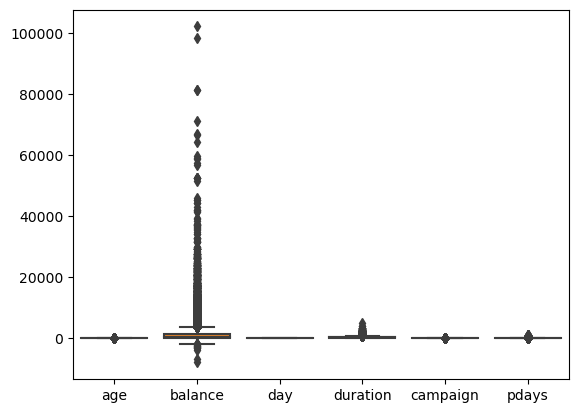

In [219]:
sns.boxplot(data1)

<Axes: >

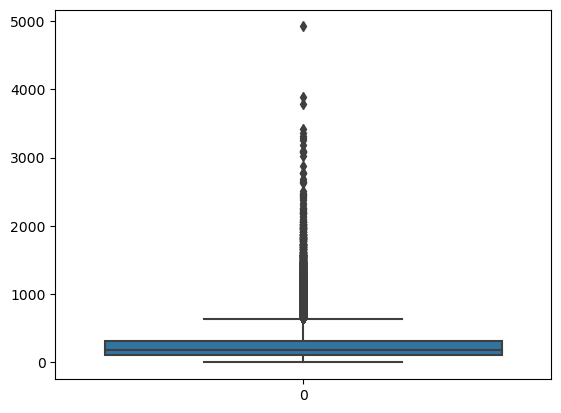

In [220]:
sns.boxplot(data1['duration'])

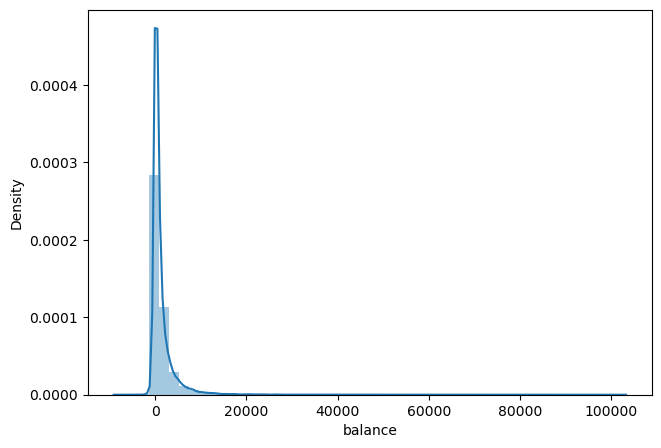

In [221]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data1['balance'])
plt.show()

In [222]:
percentile25 = data1['balance'].quantile(0.25)
percentile75 = data1['balance'].quantile(0.75)
percentile_25 = data1['duration'].quantile(0.25)
percentile_75 = data1['duration'].quantile(0.75)

In [223]:
IQR = percentile75 -percentile25 

In [224]:
iqr = percentile_75 -percentile_25

In [225]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 -1.5*IQR
Upper_limit = percentile_75 + 1.5*iqr
Lower_limit = percentile_25 -1.5*iqr

<Axes: >

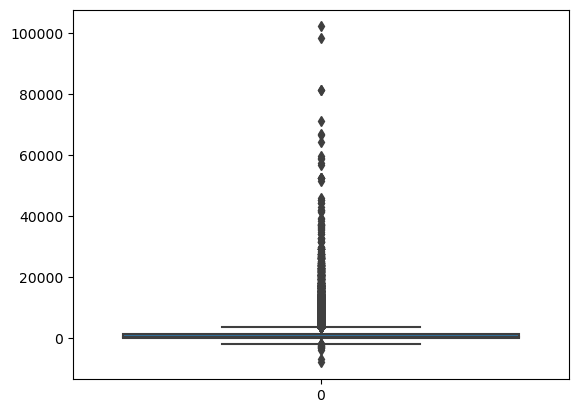

In [226]:
sns.boxplot(data1['balance']) # before removing outliers

<Axes: >

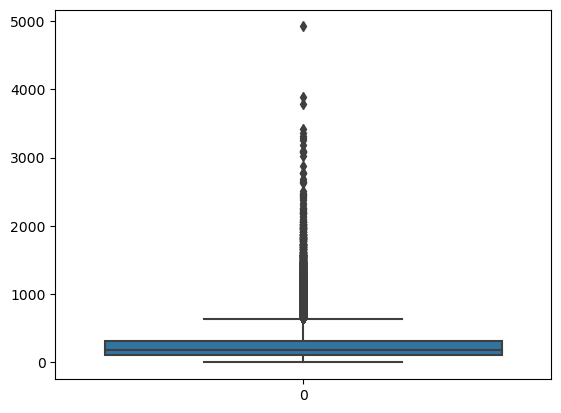

In [227]:
sns.boxplot(data1['duration']) # before removing outliers

In [228]:
data1['balance']=np.where(data1['balance']>=upper_limit,
                         upper_limit,
                         np.where(data1['balance']<=lower_limit,
                                 lower_limit,
                                 data1['balance']))

In [229]:
data1['duration']=np.where(data1['duration']>=Upper_limit,
                         Upper_limit,
                         np.where(data1['duration']<=Lower_limit,
                                 Lower_limit,
                                 data1['duration']))

<Axes: >

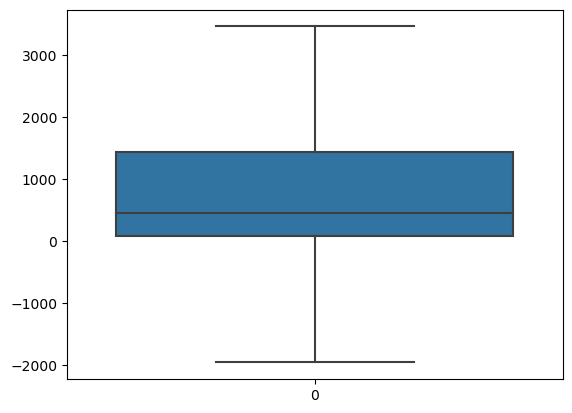

In [230]:
sns.boxplot(data1['balance']) # after removing outliers

<Axes: >

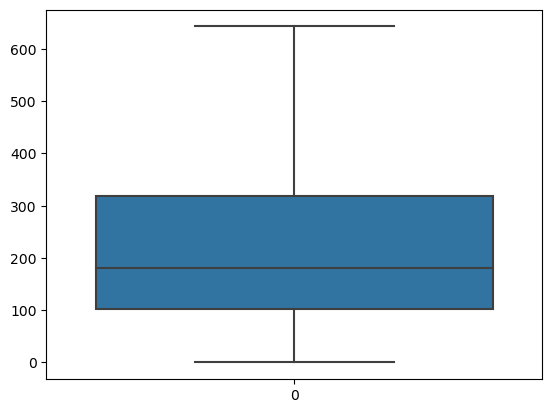

In [231]:
sns.boxplot(data1['duration'])

# Data cleaning

In [232]:
data1.isnull().sum()  # no null values 

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
y           0
dtype: int64

In [233]:
data1.shape

(45211, 7)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

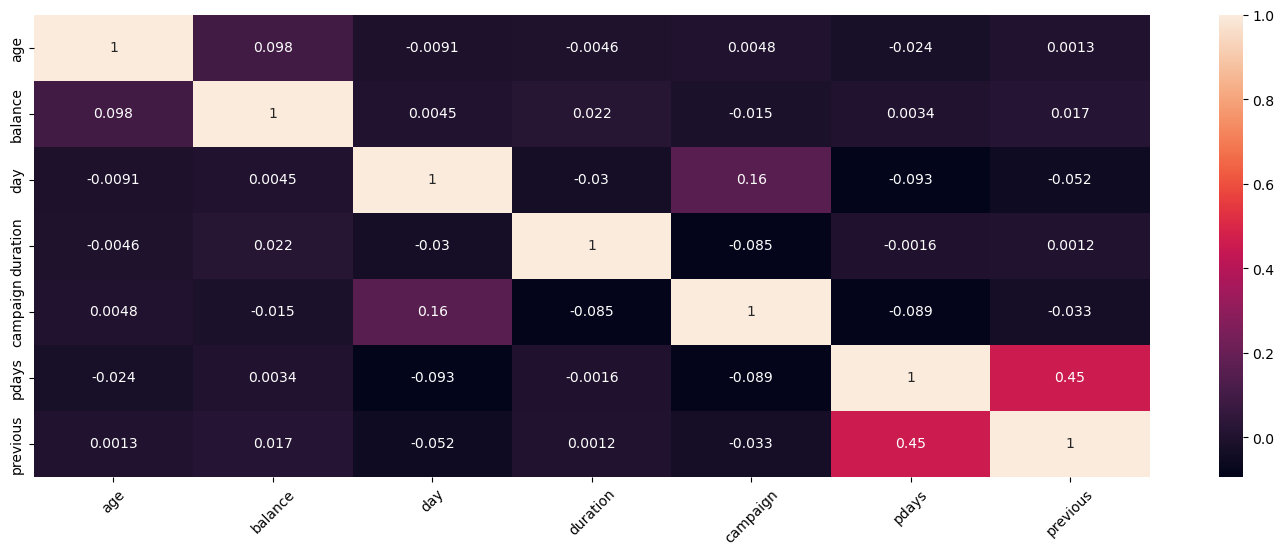

In [234]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

In [235]:
X = data1.drop(columns=['y'])
y = data1['y']

# spliting to train and test data

In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6328)



In [237]:
X_train.shape

(31647, 6)

# model selection

In [238]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [239]:
LR.fit(X_train,y_train)

LogisticRegression()

In [240]:
y_pred = LR.predict(X_test)
y_pred

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [241]:
from sklearn.metrics import accuracy_score

In [242]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.8835889118254202


In [243]:
from sklearn.model_selection import cross_val_score

In [244]:
np.mean(cross_val_score(LR,X_train,y_train,scoring='accuracy',cv=5))

0.8844754243175114